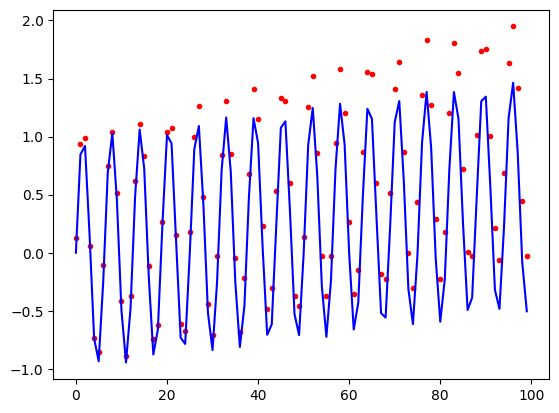

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

data_len = 1000
data_time_series = np.sin(np.arange(data_len)) + np.random.normal(0, 0.05, data_len) + np.arange(data_len)/100

plt.plot(data_time_series[0:100], 'r.')
plt.plot(range(100), np.sin(np.arange(100)) + np.arange(100)/200, 'b')
plt.show()

In [33]:
data_matrix = []
seq_len = 3

for i in range(0, data_len - seq_len):
    tmp_data = data_time_series[i:i+seq_len+1]
    data_matrix.append(tmp_data)

data_matrix_np = np.array(data_matrix)
print(data_matrix_np.shape)
print(data_matrix_np)

(997, 4)
[[ 0.12990159  0.93727906  0.99093322  0.05581573]
 [ 0.93727906  0.99093322  0.05581573 -0.73284538]
 [ 0.99093322  0.05581573 -0.73284538 -0.85871157]
 ...
 [10.87726469 10.75365826  9.78411208  9.0032135 ]
 [10.75365826  9.78411208  9.0032135   9.11648433]
 [ 9.78411208  9.0032135   9.11648433  9.99540111]]


In [34]:
x = data_matrix_np[:, 0:seq_len]
y = data_matrix_np[:, seq_len]
print(x.shape)
print(y.shape)

n_train_data = 50

x_train = x[0:n_train_data, :]
y_train = y[0:n_train_data]
x_test = x[n_train_data:x.shape[0], :]
y_test = y[n_train_data:y.shape[0]]

(997, 3)
(997,)


In [41]:
from keras import layers, models
input_shape = (seq_len, )

mlp_seq = models.Sequential()
mlp_seq.add(layers.Dense(units = 10, activation = 'tanh', input_shape = input_shape))
mlp_seq.add(layers.Dense(units = 50, activation = 'linear'))
mlp_seq.add(layers.Dense(units = 20, activation = 'linear'))
mlp_seq.add(layers.Dense(units = 1, activation = 'linear'))

mlp_seq.compile(optimizer = 'Adam', loss = 'mean_squared_error', metrics = ['mean_squared_error'])
mlp_seq.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 10)                40        
                                                                 
 dense_22 (Dense)            (None, 50)                550       
                                                                 
 dense_23 (Dense)            (None, 20)                1020      
                                                                 
 dense_24 (Dense)            (None, 1)                 21        
                                                                 
Total params: 1,631
Trainable params: 1,631
Non-trainable params: 0
_________________________________________________________________


In [42]:
history = mlp_seq.fit(x_train, y_train, validation_data = [x_test, y_test], batch_size = 16, epochs = 100)

Epoch 1/100
4/4 [==============================] - 0s 45ms/step - loss: 1.1913 - mean_squared_error: 1.1913 - val_loss: 24.0939 - val_mean_squared_error: 24.0939
Epoch 2/100
4/4 [==============================] - 0s 22ms/step - loss: 0.7801 - mean_squared_error: 0.7801 - val_loss: 27.3253 - val_mean_squared_error: 27.3253
Epoch 3/100
4/4 [==============================] - 0s 22ms/step - loss: 0.5052 - mean_squared_error: 0.5052 - val_loss: 29.9370 - val_mean_squared_error: 29.9370
Epoch 4/100
4/4 [==============================] - 0s 23ms/step - loss: 0.3462 - mean_squared_error: 0.3462 - val_loss: 31.3428 - val_mean_squared_error: 31.3428
Epoch 5/100
4/4 [==============================] - 0s 25ms/step - loss: 0.2582 - mean_squared_error: 0.2582 - val_loss: 31.5117 - val_mean_squared_error: 31.5117
Epoch 6/100
4/4 [==============================] - 0s 25ms/step - loss: 0.1714 - mean_squared_error: 0.1714 - val_loss: 29.8903 - val_mean_squared_error: 29.8903
Epoch 7/100
4/4 [===========

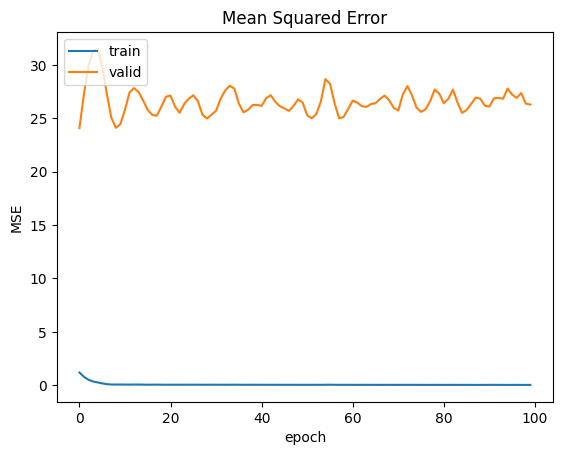

In [43]:
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('Mean Squared Error')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc = 'upper left')
plt.show()

30/30 [==============================] - 0s 859us/step


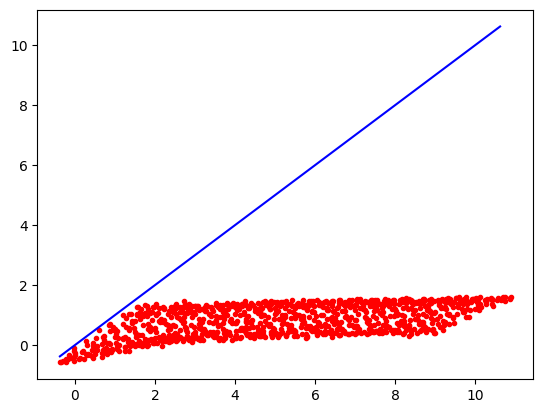

In [45]:
plt.plot(y_test, mlp_seq.predict(x_test), 'r.')
plt.plot(np.arange(min(y_test), max(y_test)), np.arange(min(y_test), max(y_test)), 'b')
plt.show()

30/30 [==============================] - 0s 2ms/step


[]

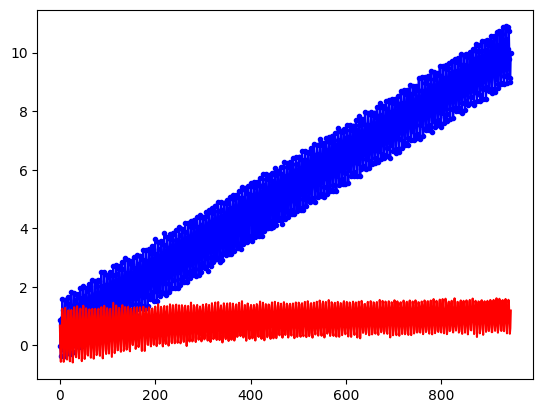

In [46]:
plt.plot(range(y_test.shape[0]), y_test, 'b.-')
plt.plot(range(y_test.shape[0]), mlp_seq.predict(x_test), 'r-')
plt.plot()

In [47]:
rnn_requence_len = 4
data_dim = 3

x = data_matrix_np[0:data_matrix_np.shape[0]-1, 0:data_dim]
y = data_matrix_np[0:data_matrix_np.shape[0]-1, data_dim]
print(x.shape)
print(y.shape)

x = np.reshape(x, (-1, rnn_requence_len, data_dim))
y = np.reshape(y, (-1, rnn_requence_len, 1))
print(x.shape)
print(y.shape)

(996, 3)
(996,)
(249, 4, 3)
(249, 4, 1)


In [49]:
n_train_data = 200

x_train = x[0:n_train_data, :]
y_train = y[0:n_train_data]
x_test = x[n_train_data:x.shape[0], :]
y_test = y[n_train_data:x.shape[0]]

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(200, 4, 3)
(49, 4, 3)
(200, 4, 1)
(49, 4, 1)


In [84]:
input_shape = (x_train[0].shape)

input = layers.Input(input_shape)      
rnn_layer = layers.LSTM(10, return_sequences = True)(input)
output = layers.TimeDistributed(layers.Dense(1, activation = 'linear'))(rnn_layer)

rnn_func = models.Model(input, output)

rnn_func.compile(optimizer = 'Adam', loss = 'mean_squared_error', metrics = ['mean_squared_error'])
rnn_func.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 4, 3)]            0         
                                                                 
 lstm_3 (LSTM)               (None, 4, 10)             560       
                                                                 
 time_distributed_7 (TimeDis  (None, 4, 1)             11        
 tributed)                                                       
                                                                 
Total params: 571
Trainable params: 571
Non-trainable params: 0
_________________________________________________________________


In [85]:
history = rnn_func.fit(x_train, y_train, validation_data = [x_test, y_test], batch_size = 16, epochs = 100)

Epoch 1/100
13/13 [==============================] - 1s 18ms/step - loss: 18.8847 - mean_squared_error: 18.8847 - val_loss: 73.8556 - val_mean_squared_error: 73.8556
Epoch 2/100
13/13 [==============================] - 0s 6ms/step - loss: 17.2400 - mean_squared_error: 17.2400 - val_loss: 69.5391 - val_mean_squared_error: 69.5391
Epoch 3/100
13/13 [==============================] - 0s 6ms/step - loss: 15.4909 - mean_squared_error: 15.4909 - val_loss: 64.2837 - val_mean_squared_error: 64.2837
Epoch 4/100
13/13 [==============================] - 0s 6ms/step - loss: 13.5962 - mean_squared_error: 13.5962 - val_loss: 58.0616 - val_mean_squared_error: 58.0616
Epoch 5/100
13/13 [==============================] - 0s 6ms/step - loss: 11.8676 - mean_squared_error: 11.8676 - val_loss: 52.1939 - val_mean_squared_error: 52.1939
Epoch 6/100
13/13 [==============================] - 0s 5ms/step - loss: 10.3542 - mean_squared_error: 10.3542 - val_loss: 47.3390 - val_mean_squared_error: 47.3390
Epoch 7/1

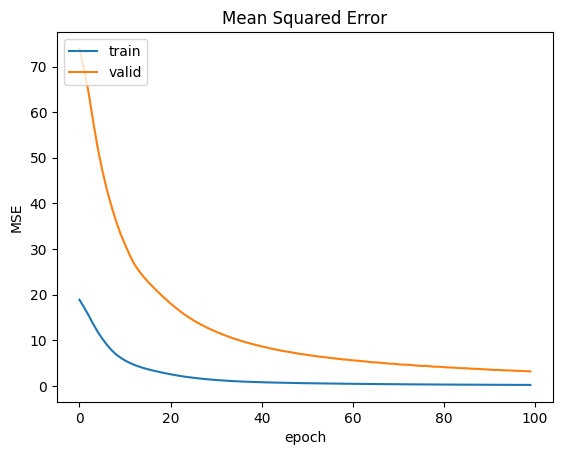

In [86]:
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('Mean Squared Error')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc = 'upper left')
plt.show()

2/2 [==============================] - 0s 2ms/step


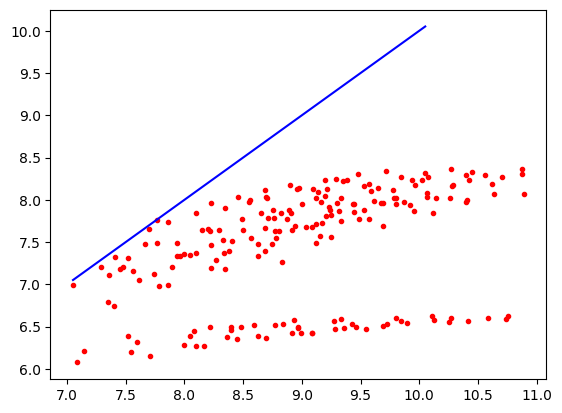

In [87]:
y_test_reshape = np.reshape(y_test, (-1,1))
plt.plot(y_test_reshape, np.reshape(rnn_func.predict(x_test), (-1,1)), 'r.')
plt.plot(np.arange(min(y_test_reshape), max(y_test_reshape)), np.arange(min(y_test_reshape), max(y_test_reshape)), 'b')
plt.show()

2/2 [==============================] - 0s 2ms/step


[]

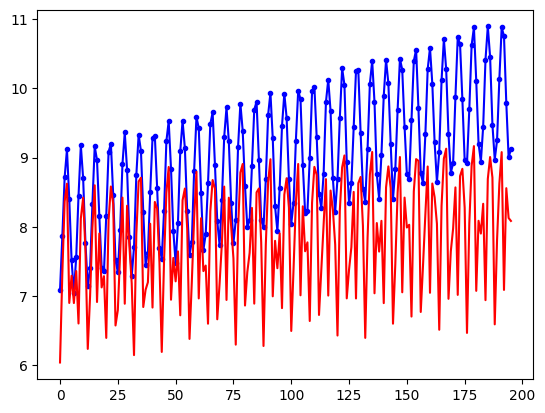

In [68]:
plt.plot(range(y_test_reshape.shape[0]), y_test_reshape, 'b.-')
plt.plot(range(y_test_reshape.shape[0]), np.reshape(rnn_func.predict(x_test), (-1,1)), 'r-')
plt.plot()